      3      2
-250 x + 75 x


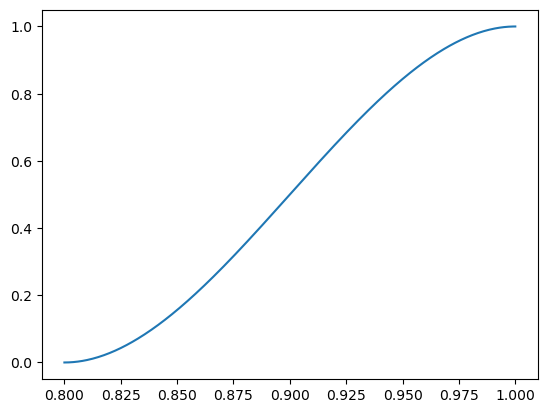

In [20]:
import matplotlib.pyplot as plt
import numpy as np

import numpy as np

def create_polynomial(width, height):
    """
    Creates a cubic polynomial that starts at point (0, 0) and ends at point (width, height).
    The derivative of the polynomial is zero at both the start and end points.
    
    Parameters:
    width (float): The width of the polynomial (distance between start and end x-coordinates).
    height (float): The height of the polynomial (difference in y-coordinates between start and end).
    
    Returns:
    np.poly1d: A polynomial object.
    """
    # The starting point is assumed to be (0, 0)
    # The ending point is assumed to be (width, height)
    
    x_0, y_0 = 0, 0
    x_1, y_1 = width, height
    
    # Coefficients for a cubic polynomial ax^3 + bx^2 + cx + d
    # We need to solve for a, b, c, d such that:
    # p(0) = 0 (start point)
    # p(width) = height (end point)
    # p'(0) = 0 (flat slope at start)
    # p'(width) = 0 (flat slope at end)
    
    # Construct the system of equations
    A = np.array([
        [x_0**3, x_0**2, x_0, 1],
        [x_1**3, x_1**2, x_1, 1],
        [3*x_0**2, 2*x_0, 1, 0],
        [3*x_1**2, 2*x_1, 1, 0]
    ])
    
    b = np.array([y_0, y_1, 0, 0])  # y-values at x_0 and x_1, and zero derivatives at both points
    
    # Solve for the coefficients
    coeffs = np.linalg.solve(A, b)
    
    # Return the polynomial
    return np.poly1d(coeffs)



# Example usage
x_0 = 0
x_1 = 0.2
y_0 = 0
y_1 = 1
width = x_1 - x_0
height = y_1 - y_0

polynomial = create_polynomial(width, height)
print(polynomial)



# Generate x values for polynomial evaluation
x_values = np.linspace(0, 0.2, 400)
# Evaluate the polynomial at the x values
y_values = polynomial(x_values)



# Plot the polynomial
plt.plot()
plt.plot(x_values + 0.8, y_values)

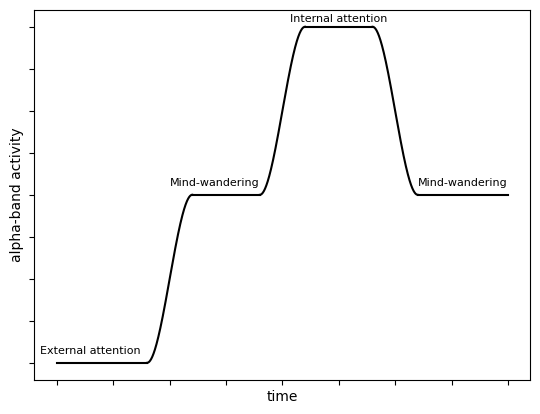

In [68]:
# Time intervals and stationary values
t_line_segments = [[0, 0.8], [1.2, 1.8], [2.2, 2.8], [3.2, 4]]
y_line_segments = [0,1,2,1]
t_poly_segments = [[0.8, 1.2], [1.8, 2.2], [2.8, 3.2]]
y_poly_segments = [[0, 1], [1, 2], [2, 1]]

# generate polynomial for each section
polynomial = create_polynomial(0.4, 1)
polynomial_inverse = create_polynomial(0.4, -1)

# generate x values for polynomial evaluation
t_values = np.linspace(0, 0.4, 400)
# evaluate the polynomial at the x values
y_values = polynomial(t_values)

# generate t values for polynomial evaluation
t_values_inverse = np.linspace(0, 0.4, 400)
# evaluate the polynomial at the t values
y_values_inverse = polynomial_inverse(t_values_inverse)

# generate t values for segments
t_values_segments = []
y_values_segments = []
for i in range(len(t_line_segments)):
    t_values_segments.append(np.linspace(t_line_segments[i][0], t_line_segments[i][1], 400))
    y_values_segments.append(np.linspace(y_line_segments[i], y_line_segments[i], 400))



# Plot each horizontal line segment
for i in range(len(t_line_segments)):
    plt.plot(t_values_segments[i], y_values_segments[i], color='black')
# Plot each polynomial segment
for i in range(len(t_poly_segments)-1):
    plt.plot(t_values + t_poly_segments[i][0], y_values + y_poly_segments[i][0], color='black')
# plot the last inverse polynomial segment
plt.plot(t_values_inverse + 2.8, y_values_inverse + y_poly_segments[2][0], color='black')
# Hide axis numbers but keep the ticks
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)  # Hide x-axis numbers, keep ticks
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=False)  # Hide y-axis numbers, keep ticks

fontsize = 8
# Add text for each segment to show the time interval
plt.text(0.3, 0.05, 'External attention', fontsize=fontsize, ha='center')
plt.text(1.4, 1.05, 'Mind-wandering', fontsize=fontsize, ha='center')
plt.text(2.5, 2.03, 'Internal attention', fontsize=fontsize, ha='center')
plt.text(3.6, 1.05, 'Mind-wandering', fontsize=fontsize, ha='center')

# Add name to y-axis
plt.ylabel('alpha-band activity')
# Add name to x-axis
plt.xlabel('time')

plt.show()
    